In [2]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [4]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [5]:
argentina_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind2.head(5)

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,SP.DYN.CBRT.IN,17.359,"Birth rate, crude (per 1,000 people)"
2015-01-01,Argentina,AR,SP.DYN.CBRT.IN,17.359,"Birth rate, crude (per 1,000 people)"
2014-01-01,Argentina,AR,SP.DYN.CBRT.IN,17.544,"Birth rate, crude (per 1,000 people)"
2013-01-01,Argentina,AR,SP.DYN.CBRT.IN,17.716,"Birth rate, crude (per 1,000 people)"
2012-01-01,Argentina,AR,SP.DYN.CBRT.IN,17.874,"Birth rate, crude (per 1,000 people)"


In [6]:
argentina_df_ind2.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [7]:
ts = argentina_df_ind2['Value'] 
ts1 = argentina_df_ind2[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,17.359
2015-01-01,17.359
2014-01-01,17.544
2013-01-01,17.716
2012-01-01,17.874


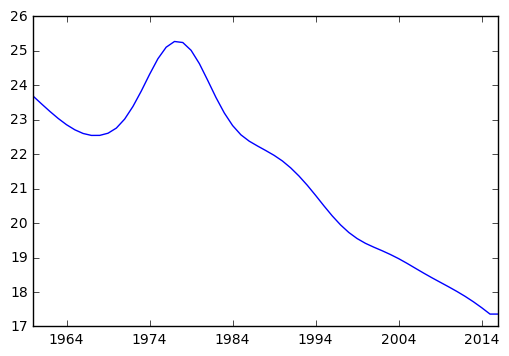

In [8]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


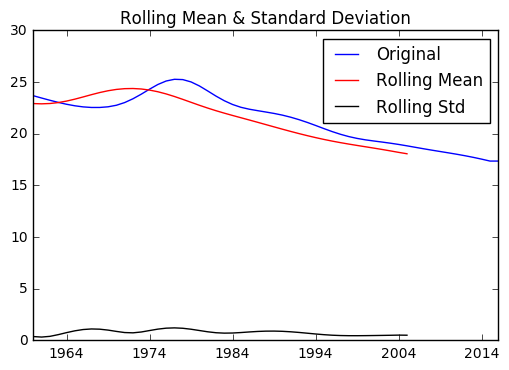

Results of Dickey-Fuller Test:
Test Statistic                 -1.207600
p-value                         0.670318
#Lags Used                      6.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (10%)           -2.598662
Critical Value (5%)            -2.921360
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts)

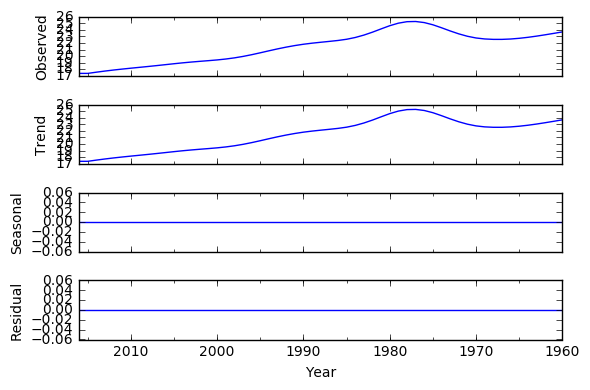

In [10]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
def meanVarianceCheck(df):
    X = df.values
    split = len(X) / 2
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    return ('mean1=%f, mean2=%f' % (mean1, mean2), 'variance1=%f, variance2=%f' % (var1, var2))

In [12]:
meanVarianceCheck(ts1)

TypeError: slice indices must be integers or None or have an __index__ method

In [13]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


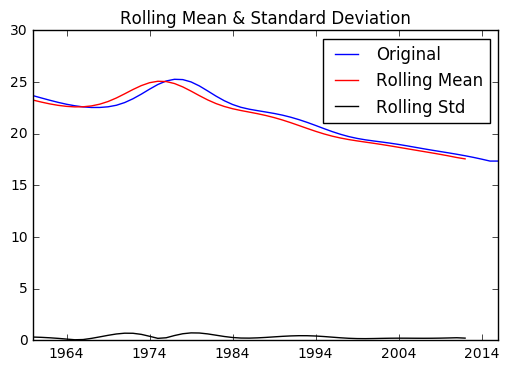

Results of Dickey-Fuller Test:
Test Statistic                 -1.207600
p-value                         0.670318
#Lags Used                      6.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (10%)           -2.598662
Critical Value (5%)            -2.921360
dtype: float64


In [14]:
test_stationarity(ts1.Value)

In [15]:
#log transform
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

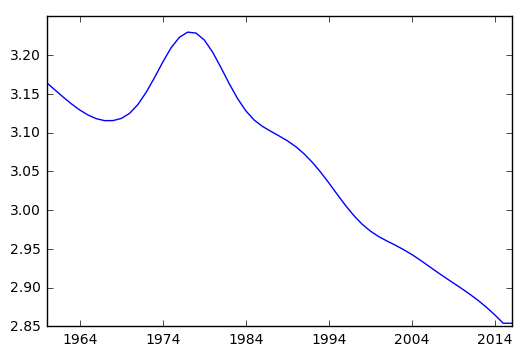

In [16]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


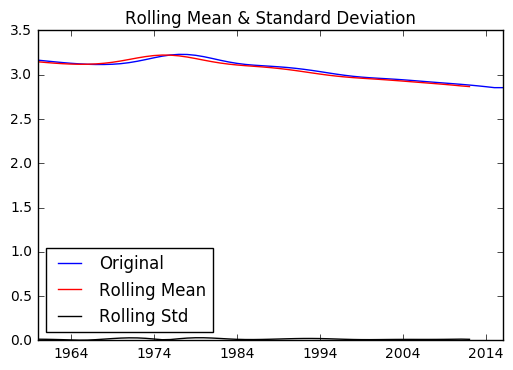

Results of Dickey-Fuller Test:
Test Statistic                 -1.336301
p-value                         0.612405
#Lags Used                      6.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (10%)           -2.598662
Critical Value (5%)            -2.921360
dtype: float64


In [17]:
test_stationarity(ts1_log.Value)

In [18]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


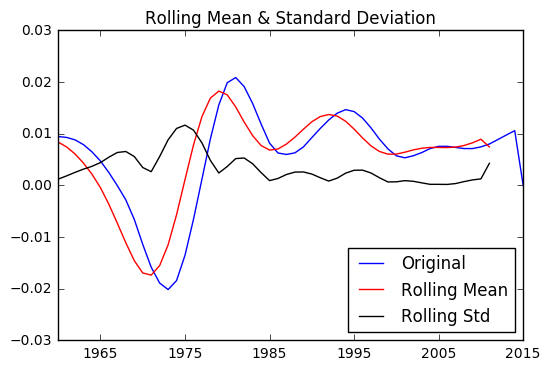

Results of Dickey-Fuller Test:
Test Statistic                 -1.645698
p-value                         0.459285
#Lags Used                      5.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (10%)           -2.598662
Critical Value (5%)            -2.921360
dtype: float64


In [19]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

In [20]:
def firstDifference(df):
    ts_first_diff = df - df.shift()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


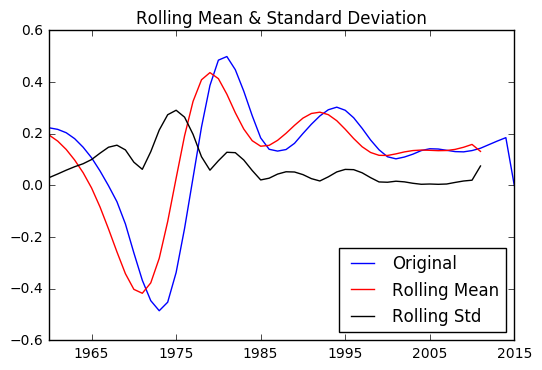

Results of Dickey-Fuller Test:
Test Statistic                 -1.687523
p-value                         0.437552
#Lags Used                     10.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (10%)           -2.602344
Critical Value (5%)            -2.928299
dtype: float64


In [21]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

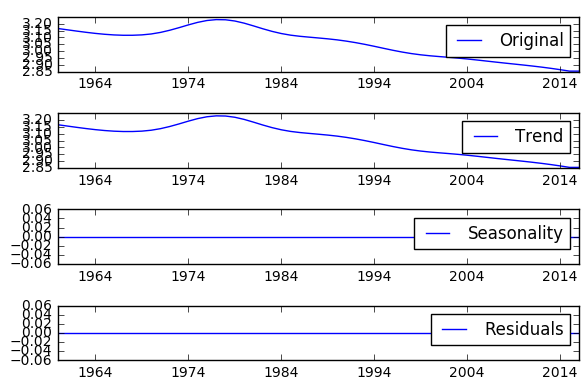

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [23]:
lag_acf = acf(ts1_log_diff, nlags=10)
lag_pacf = pacf(ts1_log_diff, nlags=10, method='ols')

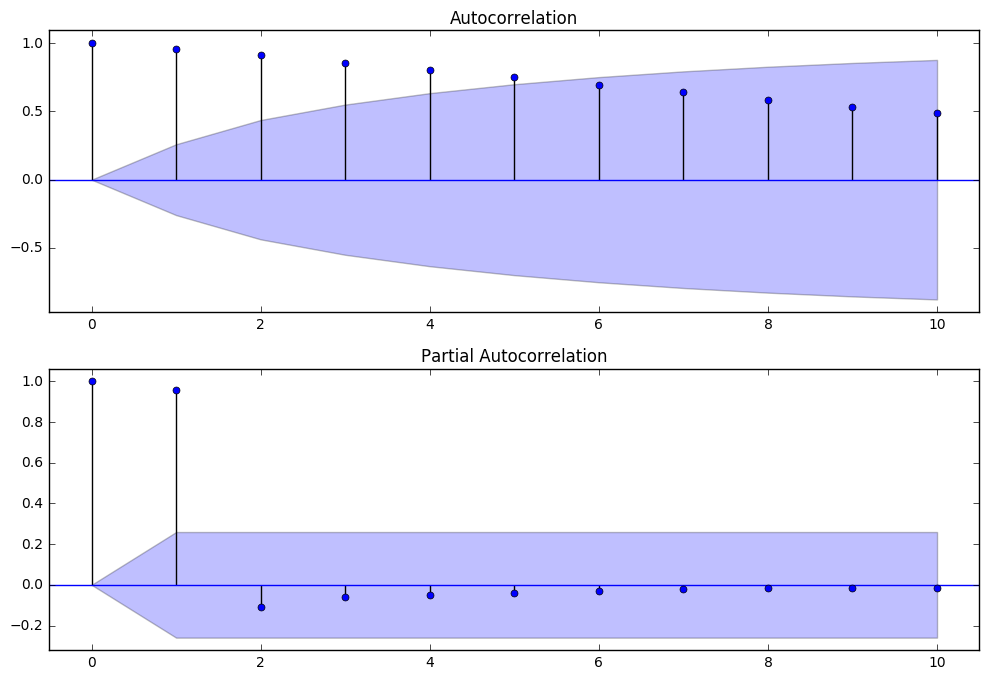

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

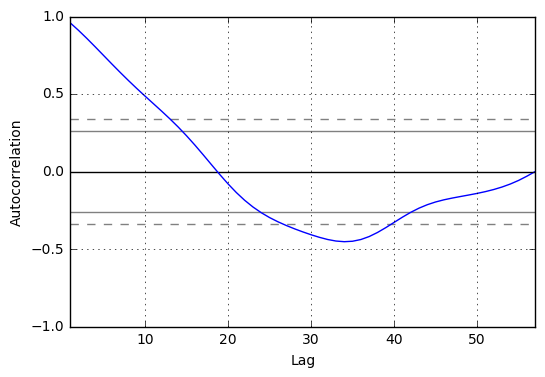

In [25]:
autocorrelation_plot(ts1_log)
plt.show()

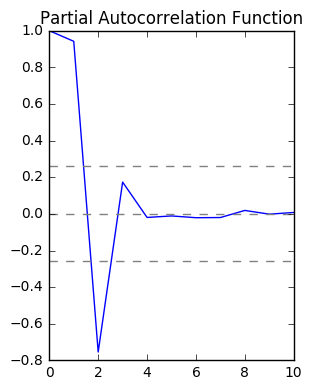

In [26]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [27]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [28]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [29]:
def AR_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 2
Coefficients: const          3.070965
ar.L1.Value    1.955712
ar.L2.Value   -0.963316
dtype: float64
2006-01-01    18.703352
Freq: -1AS-JAN, dtype: float64
-483.1463899646835


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


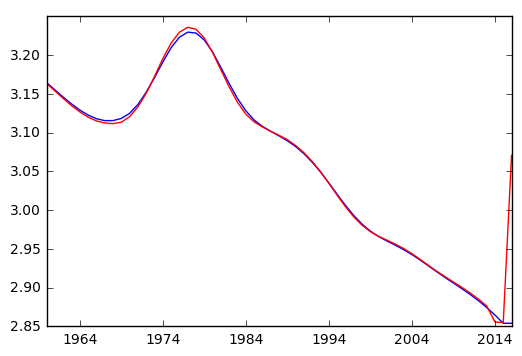

In [30]:
model_AR = AR_Model(ts1_log)

# Evaluate the parameter 

In [31]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 1))  
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 7))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          3.057444
ma.L1.Value    0.999935
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 1)   Log Likelihood                  80.016
Method:                       css-mle   S.D. of innovations              0.057
Date:                Fri, 18 Aug 2017   AIC                           -154.032
Time:                        00:36:58   BIC                           -147.903
Sample:                    01-01-2016   HQIC                          -151.650
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           3.0574      0.015    202.958      0.000         3.028     3.087
ma.L1.Value     0.9999      0.043     23.174

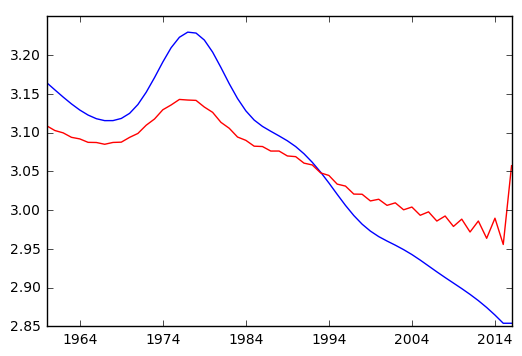

In [32]:
model_MA = MA_Model(ts1_log)

In [33]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(3, 0, 0))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(3,0, 0))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 3
Coefficients: const          3.087785
ar.L1.Value    2.729382
ar.L2.Value   -2.544189
ar.L3.Value    0.813805
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(3, 0)   Log Likelihood                 275.712
Method:                       css-mle   S.D. of innovations              0.002
Date:                Fri, 18 Aug 2017   AIC                           -541.425
Time:                        00:37:00   BIC                           -531.209
Sample:                    01-01-2016   HQIC                          -537.455
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           3.0878      0.120     25.756      0.000         2.853     3.

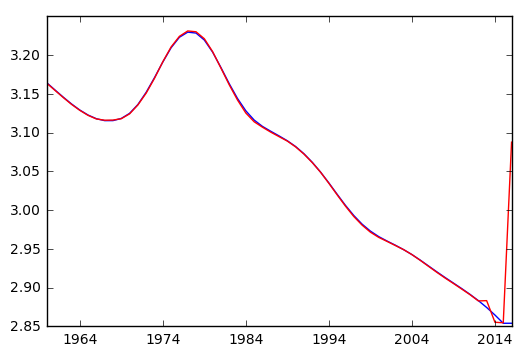

In [34]:
model_Combined = Combined_Model(ts1_log)

In [35]:
aic_metric

,AIC,Modelname
0,-483.146390,"ARIMA(ts, order=(2, 0, 0))"
0,-154.032123,"ARIMA(ts, order=(0, 0, 7))"
0,-541.424695,"ARIMA(ts, order=(3,0, 0))"


In [36]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(3,0, 0))


In [37]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    output = np.exp(output)
    print(output)
    return output

In [38]:
output_forecast = forecast(model_Combined,5)

[ 23.88967897  24.0652679   24.19733923  24.28004597  24.31280413]


In [39]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal =  np.exp(fittedVal)
    print('Predicted existing values are:')
    return PredictedVal
FittedValues(model_Combined)

Predicted existing values are:


Year
2016-01-01    21.928450
2015-01-01    17.370167
2014-01-01    17.380854
2013-01-01    17.872787
2012-01-01    17.866669
2011-01-01    18.010888
2010-01-01    18.141956
2009-01-01    18.272767
2008-01-01    18.401404
2007-01-01    18.538199
2006-01-01    18.681999
2005-01-01    18.827469
2004-01-01    18.966936
2003-01-01    19.088748
2002-01-01    19.191009
2001-01-01    19.293326
2000-01-01    19.393132
1999-01-01    19.523780
1998-01-01    19.702236
1997-01-01    19.922249
1996-01-01    20.190419
1995-01-01    20.486625
1994-01-01    20.793905
1993-01-01    21.093213
1992-01-01    21.358082
1991-01-01    21.593005
1990-01-01    21.793782
1989-01-01    21.958347
1988-01-01    22.084819
1987-01-01    22.213377
1986-01-01    22.355665
1985-01-01    22.512712
1984-01-01    22.767744
1983-01-01    23.152119
1982-01-01    23.612391
1981-01-01    24.126497
1980-01-01    24.644423
1979-01-01    25.059863
1978-01-01    25.285118
1977-01-01    25.312089
1976-01-01    25.136747
1975-01-01 